In [212]:
import pandas as pd
import numpy as np

In [213]:
# 读取数据(如果想要读取自己的记得更改文件路径)
data = pd.read_csv('C:/Users/86187/Downloads/house.csv')
data.head()

C:\Users\86187\AppData\Local\Temp\ipykernel_7136\229430158.py:2: DtypeWarning: Columns (11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/86187/Downloads/house.csv')


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/BJSY02072263....,BJSY02072263,116.632377,40.033796,1.111030e+12,2011/10/29,NaN,0,0.1,1,...,4.0,2001,1,4,0.5,0.0,1.0,0.0,13,29574.0
1,https://bj.lianjia.com/chengjiao/BJHD00299247....,BJHD00299247,116.353539,39.979585,1.111030e+12,2011/8/6,NaN,0,0.1,1,...,1.0,1998,1,6,0.3,1.0,0.0,1.0,8,75239.0
2,https://bj.lianjia.com/chengjiao/BJHD88951551....,BJHD88951551,116.324021,40.050993,1.111030e+12,2015/2/28,1.0,0,0.1,1,...,3.0,2008,1,6,0.5,1.0,0.0,0.0,8,63665.0
3,https://bj.lianjia.com/chengjiao/BJSY15751880....,BJSY15751880,116.683117,40.127185,1.111030e+12,2011/11/1,NaN,0,0.1,1,...,4.0,2004,1,2,0.5,1.0,0.0,0.0,13,37937.0
4,https://bj.lianjia.com/chengjiao/BJSY84271148....,BJSY84271148,116.661432,40.180564,1.111030e+12,2012/2/26,NaN,0,0.1,1,...,4.0,2001,1,2,0.5,0.0,0.0,0.0,13,31282.0


In [214]:
# 数据规格(统共318851行26列)
data.shape

(318851, 26)

In [215]:
data.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

In [216]:
# 扔掉url、id、DOM和fiveYearsProperty这几列(之后不会再考虑这几个方面的问题)
data = data.drop(['url', 'id', 'DOM','fiveYearsProperty'], axis=1)
data.columns

Index(['Lng', 'Lat', 'Cid', 'tradeTime', 'followers', 'totalPrice', 'price',
       'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'subway', 'district',
       'communityAverage'],
      dtype='object')

In [217]:
# 删去totalPrice为0.1的数据(这些数据经观察不合法,price*square和totalprice不符合)
count = (data['totalPrice'] == 0.1).sum()
print(f"totalPrice中等于0.1的行数为: {count}")
data = data[data['totalPrice'] != 0.1]
data['totalPrice']

totalPrice中等于0.1的行数为: 227


225          0.2
228          0.2
229          1.0
230          1.0
231          1.0
           ...  
318846     666.0
318847     982.5
318848    1665.0
318849     720.0
318850    4250.0
Name: totalPrice, Length: 318624, dtype: float64

In [218]:
# 删除constructionTime为Î´Öª的数据(这些数据经观察不合法)
count = (data['constructionTime']=='Î´Öª').sum()
print(f"constructionTime中非法数据的行数为: {count}")
data = data[data['constructionTime'] != 'Î´Öª']
data['constructionTime']

constructionTime中非法数据的行数为: 19266


225       2002
228       1996
229       2002
230       1992
231       1993
          ... 
318845    2004
318846    2004
318847    1999
318848    2003
318849    1985
Name: constructionTime, Length: 299358, dtype: object

In [219]:
# 取出floor部分的楼层而删除他在楼中的相对高度(不考虑相对高度)
data['floor'] = data['floor'].str.split(' ').str[1]
data['floor']

225        5
228        9
229        7
230        6
231        6
          ..
318845    14
318846    16
318847    12
318848    19
318849     6
Name: floor, Length: 299358, dtype: object

In [220]:
data.shape

(299358, 22)

In [221]:
# 此外buildingType数据仍有缺失我们直接删除即可
data.dropna(subset=['buildingType'], inplace=True) #丢掉nan的部分
data.shape

(297813, 22)

In [222]:
data.columns

Index(['Lng', 'Lat', 'Cid', 'tradeTime', 'followers', 'totalPrice', 'price',
       'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'subway', 'district',
       'communityAverage'],
      dtype='object')

In [223]:
data['tradeTime']

225        2011/9/26
228        2014/9/16
229       2015/12/16
230        2016/7/30
231       2013/11/30
             ...    
318845     2017/2/18
318846      2017/5/7
318847     2016/7/25
318848     2017/2/15
318849      2017/3/6
Name: tradeTime, Length: 297813, dtype: object

In [224]:
data.drop(['totalPrice'], axis=1) #丢掉communityAverage这一列
# 添加新的列tradeTimeModefiy,将tradeTime转化为天数
tradeTimeModefiy = data['tradeTime'].str.split('/').str[0].astype(int)*365 + data['tradeTime'].str.split('/').str[1].astype(int)*30 + data['tradeTime'].str.split('/').str[2].astype(int)
data['tradeTimeModefiy'] = tradeTimeModefiy

In [225]:
data['tradeTimeModefiy']

225       734311
228       735396
229       735851
230       736080
231       735105
           ...  
318845    736283
318846    736362
318847    736075
318848    736280
318849    736301
Name: tradeTimeModefiy, Length: 297813, dtype: int64

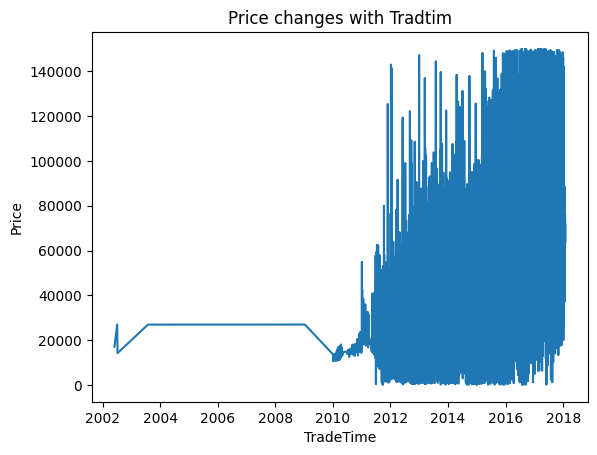

In [226]:
import matplotlib.pyplot as plt

# 转化为datetime类型
data['tradeTime'] = pd.to_datetime(data['tradeTime'])
# 根据tradeTime对数据进行排序
data.sort_values('tradeTime', inplace=True)
# 绘制price随tradeTime变化的图
plt.plot(data['tradeTime'], data['price'])
plt.title('Price changes with Tradtim')
plt.xlabel('TradeTime')
plt.ylabel('Price')
plt.show()

In [227]:
# 我们观察图标2011年前的数目很少,如果带入总体数据计算要考虑通胀因素所以考虑删除2010年前的数据
count = (data['tradeTime']<'2011-01-01').sum()
print('2011年前的交易数据总共有:',count)

2011年前的交易数据总共有: 194


In [228]:
data = data[data['tradeTime']>='2011-01-01']

In [229]:
data.columns

Index(['Lng', 'Lat', 'Cid', 'tradeTime', 'followers', 'totalPrice', 'price',
       'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'subway', 'district',
       'communityAverage', 'tradeTimeModefiy'],
      dtype='object')

C:\Users\86187\AppData\Local\Temp\ipykernel_7136\652213493.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data['price'].resample('M').mean()


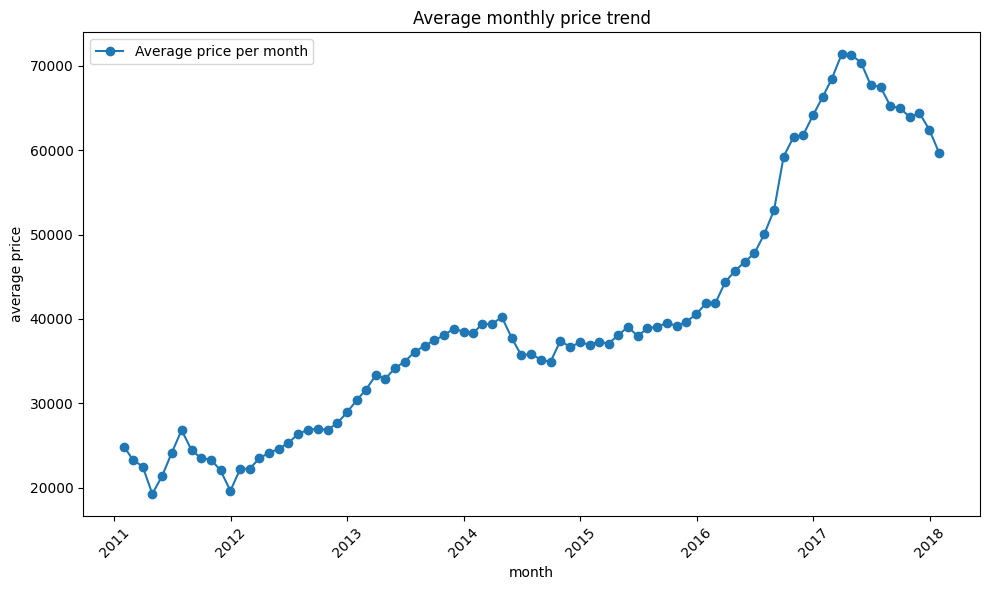

In [230]:
# 将tradeTime列设置为索引
data.set_index('tradeTime', inplace=True)
# 按月重采样并计算平均值，这里假设我们计算的是价格的平均值
monthly_avg = data['price'].resample('M').mean()
plt.figure(figsize=(10, 6))
# 绘制每个月平均值的线图
plt.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', label='Average price per month')
plt.title('Average monthly price trend')
plt.xlabel('month')
plt.ylabel('average price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
data.reset_index(inplace=True)

C:\Users\86187\AppData\Local\Temp\ipykernel_7136\3499363738.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data['followers'].resample('M').mean()


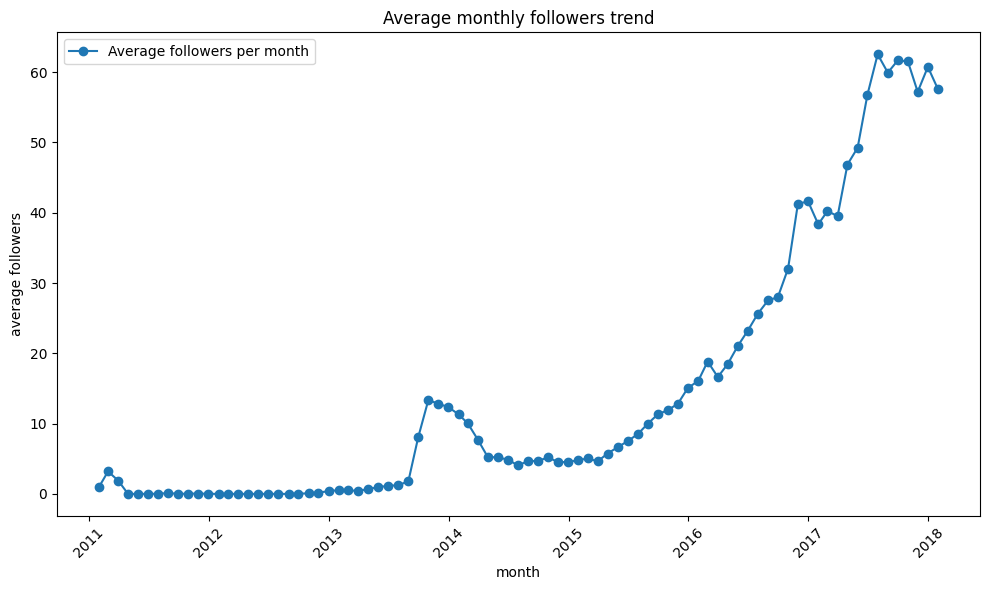

In [231]:
# 将tradeTime列设置为索引
data.set_index('tradeTime', inplace=True)
# 按月重采样并计算平均值，这里假设我们计算的是价格的平均值
monthly_avg = data['followers'].resample('M').mean()
plt.figure(figsize=(10, 6))
# 绘制每个月平均值的线图
plt.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', label='Average followers per month')
plt.title('Average monthly followers trend')
plt.xlabel('month')
plt.ylabel('average followers')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
data.reset_index(inplace=True)

In [232]:
# 2010年至2018年的中国通货膨胀率如下：‌
# 2011年通货膨胀率为5.55%;2012年通货膨胀率为2%;2013年通货膨胀率为2.7%;2014年通货膨胀率为2.3%;2015年通货膨胀率为1.6%;
# 2016年通货膨胀率为1.9%;2017年通货膨胀率为1.5%;2018年通货膨胀率为2.5%;2019年通货膨胀率为2.9%
# 可以发现通货膨胀率在2%左右,对整体房价影响不大我们可以在整个2011到2018年进行讨论

In [233]:
# 总价格和面积已经使用完毕我们考虑将其舍弃
data.drop(['totalPrice', 'square'], axis=1, inplace=True)
data.columns

Index(['tradeTime', 'Lng', 'Lat', 'Cid', 'followers', 'price', 'livingRoom',
       'drawingRoom', 'kitchen', 'bathRoom', 'floor', 'buildingType',
       'constructionTime', 'renovationCondition', 'buildingStructure',
       'ladderRatio', 'elevator', 'subway', 'district', 'communityAverage',
       'tradeTimeModefiy'],
      dtype='object')

In [234]:
# 计算均值和标准差
mean = data['price'].mean()
std = data['price'].std()
# 定义异常值的界限(3σ原则筛查)
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
# 识别异常值的索引
err = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)].index
# 遍历异常值索引
for index in err:
    # 获取当前异常值的Cid
    current_cid = data.loc[index, 'Cid']
    # 计算具有相同Cid的数据组(排除当前异常值)的平均值
    group_mean = data[(data['Cid'] == current_cid) & (data.index != index)]['price'].mean()
    # 如果数据组为空（即没有其他相同Cid的数据），则使用全局均值
    if pd.isna(group_mean):
        group_mean = mean
    # 使用计算出的平均值替换异常值
    data.loc[index, 'price'] = group_mean
# 验证替换结果
print(data)

C:\Users\86187\AppData\Local\Temp\ipykernel_7136\374483979.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '43794.584199358535' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'price'] = group_mean


        tradeTime         Lng        Lat           Cid  followers    price  \
0      2011-01-01  116.121964  39.939762  1.111030e+12          0  22699.0   
1      2011-01-02  116.122354  39.937384  1.111030e+12          0  21527.0   
2      2011-01-03  116.121964  39.939762  1.111030e+12          0  20201.0   
3      2011-01-03  116.122150  39.932268  1.111030e+12          0  18619.0   
4      2011-01-04  116.470121  40.018763  1.111030e+12          0  34634.0   
...           ...         ...        ...           ...        ...      ...   
297614 2018-01-22  116.220283  40.043636  1.111030e+12        112  51096.0   
297615 2018-01-22  116.585426  39.911902  1.111030e+12         98  37244.0   
297616 2018-01-24  116.346429  40.001408  1.111030e+12          1  76159.0   
297617 2018-01-26  116.441502  39.872065  1.111030e+12          0  63468.0   
297618 2018-01-28  116.417045  40.006843  1.111030e+12         53  71577.0   

       livingRoom drawingRoom  kitchen bathRoom  ... buildingTy

In [235]:
# 计算最大值和最小值
max_value = data['followers'].max()
min_value = data['followers'].min()
# 应用最大最小标准化
data['followers'] = (data['followers'] - min_value) / (max_value - min_value)
data['followers']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
297614    0.097988
297615    0.085739
297616    0.000875
297617    0.000000
297618    0.046369
Name: followers, Length: 297619, dtype: float64

In [236]:
# 计算最大值和最小值
max_value = data['price'].max()
min_value = data['price'].min()
# 应用最大最小标准化
data['price'] = (data['price'] - min_value) / (max_value - min_value)
data['price']

0         0.207774
1         0.197043
2         0.184901
3         0.170416
4         0.317054
            ...   
297614    0.467784
297615    0.340951
297616    0.697267
297617    0.581065
297618    0.655313
Name: price, Length: 297619, dtype: float64

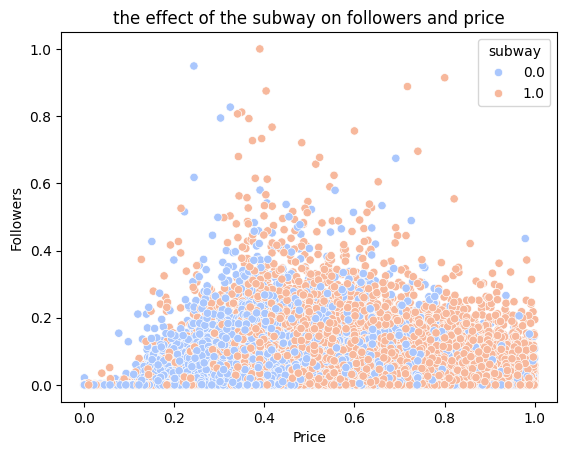

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
# 使用Seaborn的scatterplot方法来绘制，其中hue参数用于表示第三个变量
sns.scatterplot(data=data, x='price', y='followers', hue='subway', palette='coolwarm')
plt.title('the effect of the subway on followers and price')
plt.xlabel('Price')
plt.ylabel('Followers')
plt.show()

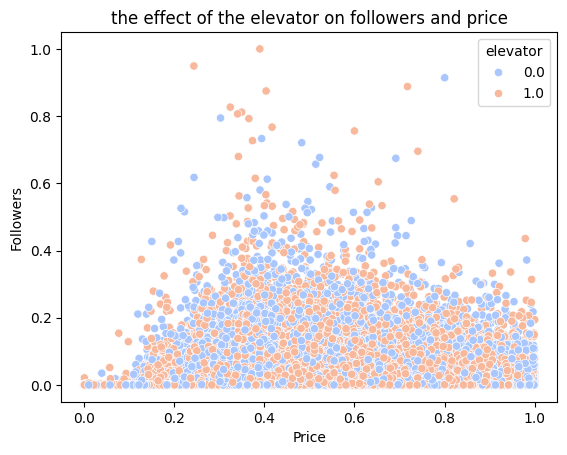

In [238]:
# 我们探索一下电梯对房价和关注度的影响
sns.scatterplot(data=data, x='price', y='followers', hue='elevator', palette='coolwarm')
plt.title('the effect of the elevator on followers and price')
plt.xlabel('Price')
plt.ylabel('Followers')
plt.show()

In [257]:
data['floor'] = pd.to_numeric(data['floor'], errors='coerce')
filtered_data = data[data['floor'] <= 7]
filtered_data_higher = filtered_data[(filtered_data['price'] >= 0.5) & (filtered_data['followers'] >= 0.05)]
proportion = filtered_data_higher.shape[0] / filtered_data.shape[0]
print(f"在低层建筑中price和followers比较大的数据点占比为: {proportion:.2%}")

在低层建筑中price和followers比较大的数据点占比为: 3.45%


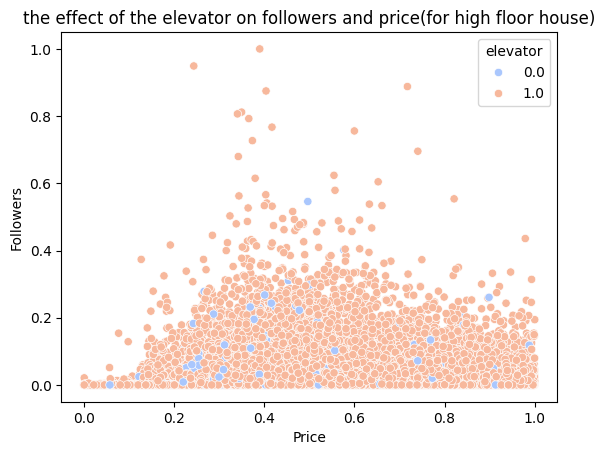

In [243]:
# 这样看可能不是很直观,我们假设一个前提在房屋是高层的情况下如果没有电梯的造成的影响
# 过滤floor数目大于8的数据
filtered_data = data[data['floor'] > 7]
# 使用过滤后的数据绘制图表
sns.scatterplot(data=filtered_data, x='price', y='followers', hue='elevator', palette='coolwarm')
plt.title('the effect of the elevator on followers and price(for high floor house)')
plt.xlabel('Price')
plt.ylabel('Followers')
plt.show()

In [246]:
# 过滤出同时满足price和followers比较大的数据点
filtered_data_higher = filtered_data[(filtered_data['price'] >= 0.5) & (filtered_data['followers'] >= 0.05)]
proportion = filtered_data_higher.shape[0] / filtered_data.shape[0]
print(f"在高层建筑中price和followers比较大的数据点占比为: {proportion:.2%}")

在高层建筑中price和followers比较大的数据点占比为: 3.66%
